# Neuroscience Data Analysis with Python Workshop 
## MiniProject #1 - Laptop Price Dataset
Orr Levy, 206754087 


## Project Overview

In this project, we analyze the **laptop-price dataset** using Python.  
We will:

- Import and explore the dataset  
- Visualize laptop price distributions  
- Compare average laptop prices by company  
- Clean and unify operating system labels  
- Plot price distributions per OS  
- Explore the relationship between RAM and price  
- Detect outliers  
- Extract storage type from the "Memory" column  


---

## Import Libraries


In [12]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Load the Dataset

In [13]:
# upload the dataset
df = pd.read_csv("laptop_price - dataset.csv")
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


## 1. Price Distribution of All Laptops

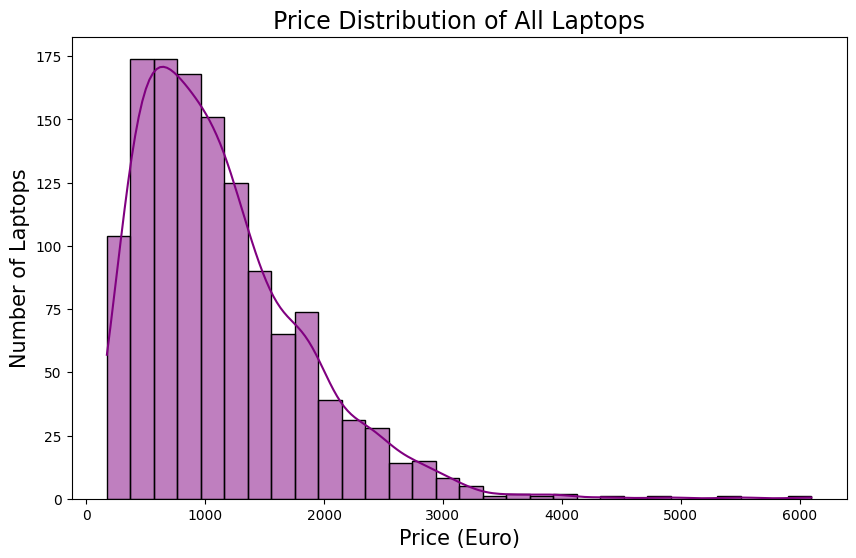

In [23]:
# Setting the plot size
plt.figure(figsize=(10, 6))

# Using seaborn to create a histogram of the 'Price (Euro)' column
# kde=True adds a density line for a clearer distribution view
sns.histplot(x='Price (Euro)', data=df, kde=True, bins=30, color='purple') 

# Main title
plt.title('Price Distribution of All Laptops', fontsize=17)

# Axes labels
plt.xlabel('Price (Euro)', fontsize=15)
plt.ylabel('Number of Laptops', fontsize=15) 

# Display the plot
plt.show()

## 2. Average Laptop Price per Company

The company with the most expensive laptops on average is: Razer


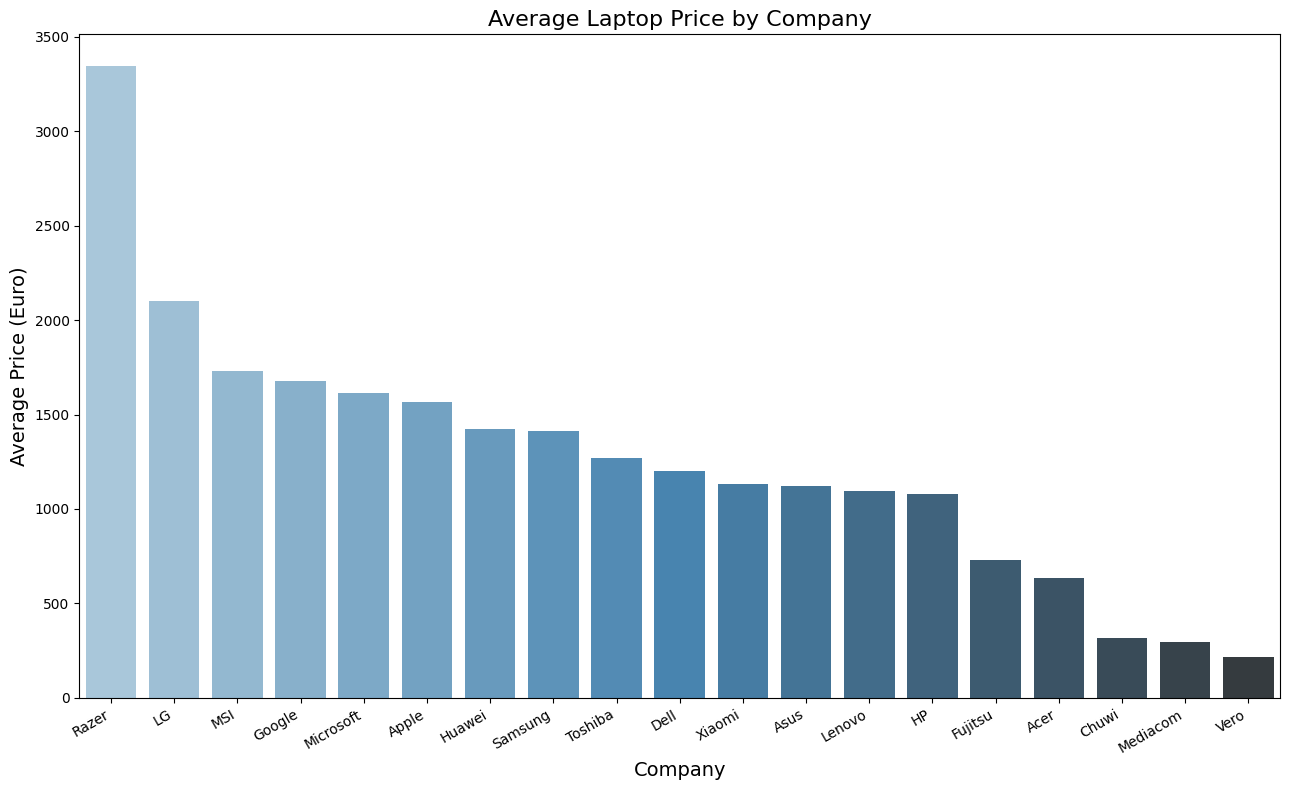

In [27]:
# new variable containing average price per company
avg_price_per_company = df.groupby('Company')['Price (Euro)'].mean()

# sort the average prices in descending order (ascending=False)
sorted_avg_prices = avg_price_per_company.sort_values(ascending=False)

# The company that has on average the most expensive laptops
most_expensive_company = sorted_avg_prices.idxmax()
print(f"The company with the most expensive laptops on average is: {most_expensive_company}")

# The average laptop price for each company
# Visualize using a bar plot
# Set the plot size (wider so the company's names will fit in)
plt.figure(figsize=(13, 8))

# X axis: Company names (Index of the sorted results)
# Y axis: Average Prices (Values of the sorted results)
# adding color palette for better visualation
sns.barplot(
    x=sorted_avg_prices.index,
    y=sorted_avg_prices.values,
    hue=sorted_avg_prices.index,   # assign hue for color differentiation
    palette="Blues_d",
    legend=False                   # hide unnecessary legend
)

# Add titles and axes labels
plt.title('Average Laptop Price by Company', fontsize=16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Average Price (Euro)', fontsize=14)

# Rotate x-axis labels for better readability, adjust layout to prevent clipping
plt.xticks(rotation=30, ha='right')
plt.tight_layout() 

plt.show()

## 3. Operating System Cleaning & Standardization

In [ ]:
df = pd.read_csv('laptop_price - dataset.csv')

# Find all unique operating systems in the dataset
print("Unique operating systems before fixing:")
print(df['OpSys'].unique())

# create a mapping dictionary for replacement and replace the values in the 'OpSys' column using the mapping dictionary
# keys are the original values, values are the new values
df['OpSys'] = df['OpSys'].replace({
    'Windows 10': 'Windows',
    'Windows 7': 'Windows',
    'Windows 10 S': 'Windows',
    'Mac OS X': 'macOS'
})

# Verify the replacement by checking unique values again
print("\nUnique operating systems after fixing:")
print(df['OpSys'].unique())

Unique operating systems before fixing:
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']

Unique operating systems after fixing:
['macOS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


## 4. Price Distribution per Operating System

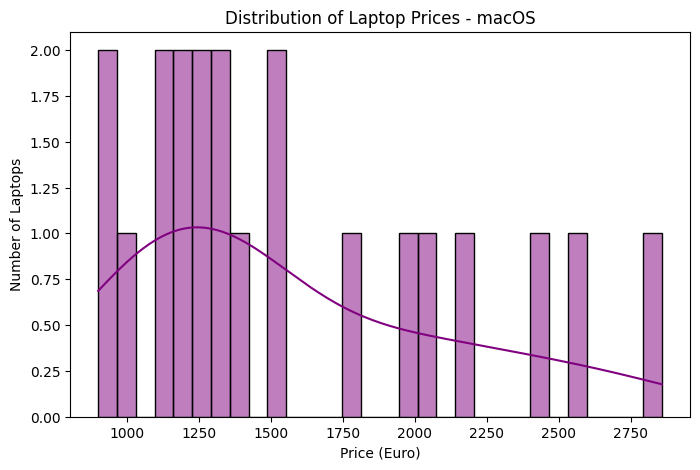

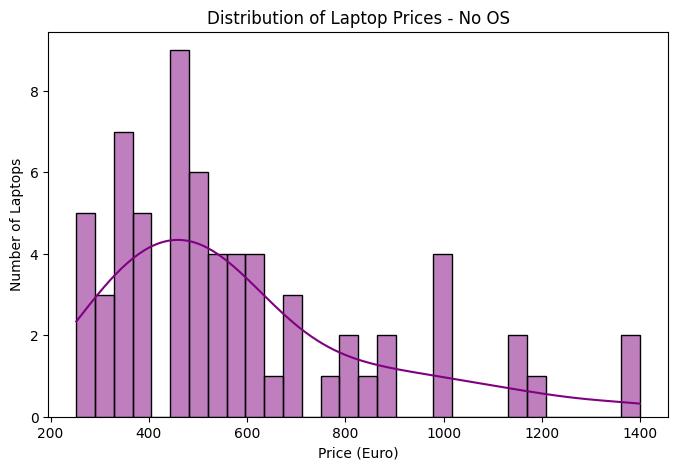

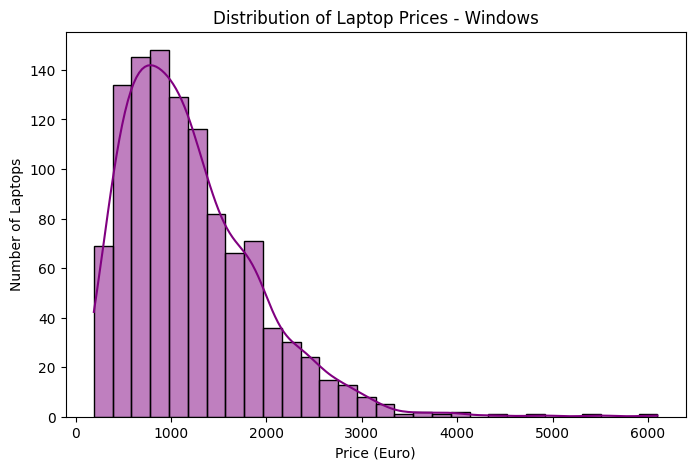

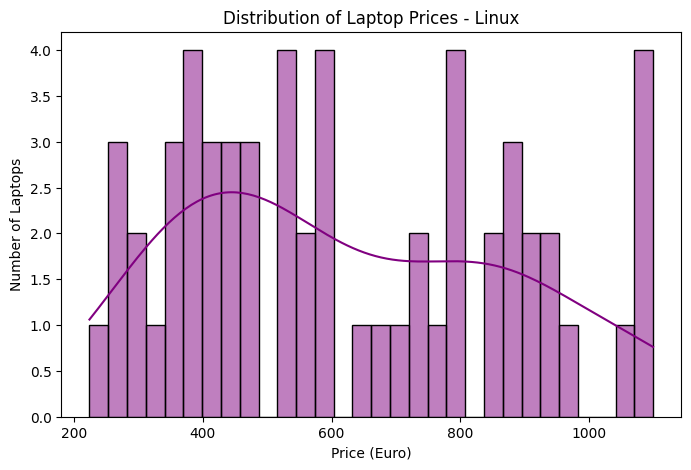

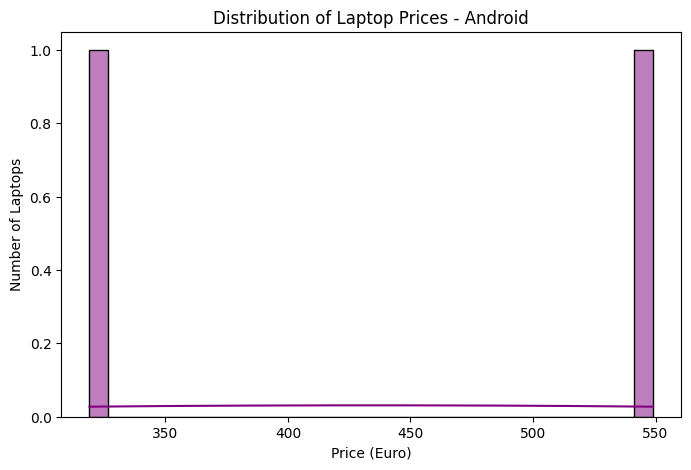

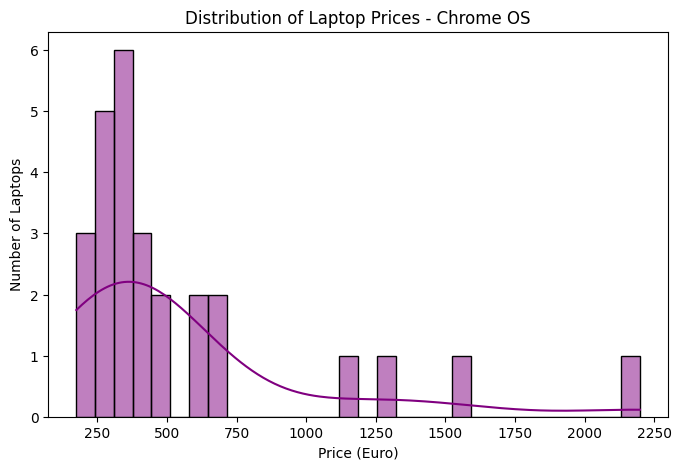

In [54]:
unique_opsys = df['OpSys'].unique()
# Plot histograms for each operating system
for os in unique_opsys:
    plt.figure(figsize=(8,5))
    sns.histplot(df[df['OpSys'] == os]['Price (Euro)'], bins=30, kde=True, color='purple')
    plt.title(f"Distribution of Laptop Prices - {os}")
    plt.xlabel("Price (Euro)")
    plt.ylabel("Number of Laptops")
    plt.show()

## 5. Relationship Between RAM and Price

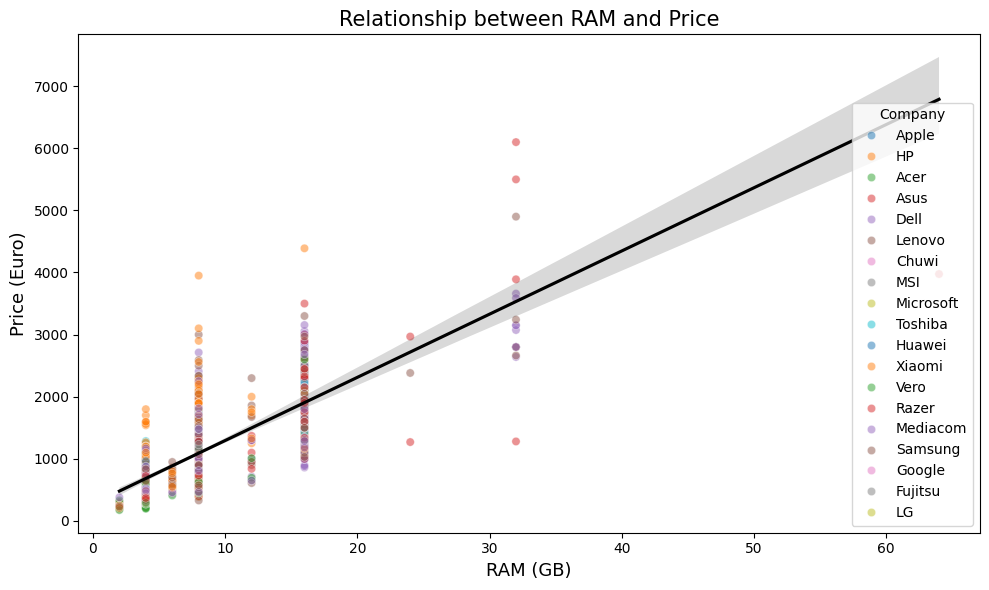

In [79]:
# Relationship between RAM and Price + regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAM (GB)', y='Price (Euro)', data=df, hue='Company', palette='tab10', alpha=0.5)
sns.regplot(x='RAM (GB)', y='Price (Euro)', data=df, scatter=False, color='black')
plt.title('Relationship between RAM and Price', fontsize=15)
plt.xlabel('RAM (GB)', fontsize=13)
plt.ylabel('Price (Euro)', fontsize=13)
plt.tight_layout()
plt.show()

## 6. Outlier Detection (IQR Method)

In [78]:
# Outlier detection in Price using statistical IQR method
Q1 = df['Price (Euro)'].quantile(0.25)
Q3 = df['Price (Euro)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df[(df['Price (Euro)'] < lower_bound) | (df['Price (Euro)'] > upper_bound)]
print(f"Number of outliers detected: {outliers.shape[0]}")
outliers.head()

Number of outliers detected: 28


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Storage type
17,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.9,16,512GB SSD,AMD,Radeon Pro 560,macOS,1.83,2858.0,SSD
196,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel,Core i7 7820HK,2.9,32,1TB SSD,Nvidia,GeForce GTX 1080,Windows,3.49,6099.0,SSD
204,Dell,Precision 7520,Workstation,15.6,4K Ultra HD 3840x2160,Intel,Xeon E3-1505M V6,3.0,16,256GB SSD + 1TB HDD,Nvidia,Quadro M1200,Windows,2.80,3055.0,SSD + 1TB HDD
238,Asus,ROG G703VI-E5062T,Gaming,17.3,Full HD 1920x1080,Intel,Core i7 7820HK,2.9,32,512GB SSD + 1TB HDD,Nvidia,GeForce GTX 1080,Windows,4.70,3890.0,SSD + 1TB HDD
247,Asus,Rog G701VIK-BA060T,Gaming,17.3,Full HD 1920x1080,Intel,Core i7 7820HK,2.9,16,256GB SSD,Nvidia,GeForce GTX 1080,Windows,3.60,2999.0,SSD


## 7. Extracting Storage Type from the "Memory" Column

In [77]:
# Spliting the 'Memory' column to extract storage type + creating a new column
df['Storage type'] = df['Memory'].str.split(' ', n=1).str[1]

# Displaying the first 5 rows to verify
print(df[["Memory", "Storage type"]].head())

                Memory   Storage type
0            128GB SSD            SSD
1  128GB Flash Storage  Flash Storage
2            256GB SSD            SSD
3            512GB SSD            SSD
4            256GB SSD            SSD
